In [61]:
# 1. Ucitati podatke (kolona y 'da li je klijent uplatio oroceni depozit')
import pandas as pd

dataUri = r'C:\Users\damir.pajaziti\Desktop\anakonda\Data\bank-additional.csv'
dataSeparators = [';','|', '/']

bank = pd.read_csv(dataUri, sep = dataSeparators[0])

In [62]:
# 2. Deskriptivna statistika
print('Statistical described attributes: \n')
print(bank.describe())
print('---------------------------------------------------------------------------\n')

print('IsNull for each column: \n')
print(bank.isnull().sum(axis=0))
print('---------------------------------------------------------------------------\n')

print('Data types:\n')

df = pd.DataFrame(bank)

print(df.dtypes)
print('---------------------------------------------------------------------------\n')

Statistical described attributes: 

               age     duration     campaign        pdays     previous  \
count  4119.000000  4116.000000  4114.000000  4119.000000  4117.000000   
mean     40.113620   256.869048     2.534273   960.422190     0.190430   
std      10.313362   254.763913     2.566673   191.922786     0.541904   
min      18.000000     0.000000     1.000000     0.000000     0.000000   
25%      32.000000   103.000000     1.000000   999.000000     0.000000   
50%      38.000000   181.000000     2.000000   999.000000     0.000000   
75%      47.000000   317.250000     3.000000   999.000000     0.000000   
max      88.000000  3643.000000    35.000000   999.000000     6.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx    euribor3m  
count   4116.000000     4117.000000    4117.000000  4117.000000  
mean       0.084694       93.579540     -40.486358     4.858993  
std        1.563361        0.579442       4.639840    79.432456  
min       -3.400000       92.2010

In [63]:
# 3. Pripremiti skup podataka tako da bude pogodan za prediktivno modelovanje

# Ukloniti null vrednosti za labele
bank = df.dropna()
        # provera: print(bank.isnull().sum(axis=0))

# mapiranje yes no u 0 i 1
outcome = bank['y']

class_map = {'yes':1, 'no':0}

# napraviti labelu od kolone y - pretvoriti je u numericku vrednost
outcame = outcome.map(class_map)

bank_num = bank.select_dtypes(exclude = ['object'])
bank_cat = bank.select_dtypes(include = ['object'])

# setujem samo input kolone za PCI
bank_cat = bank_cat.loc[:, bank_cat.columns != 'y']

print('Categorical data')
print(bank_cat.count())

print('Numeric data')
print(bank_num.count())

    # Dodati outcame kolonu # bank_num['y'] = outcame
    # print(bank_num)

    # provera null vrednosti
    #bank_num.isnull().sum(axis=0)

    # bank_cat.describe()

    # bank_cat['job'].value_counts()

Categorical data
job            4098
marital        4098
education      4098
default        4098
housing        4098
loan           4098
contact        4098
month          4098
day_of_week    4098
poutcome       4098
nr.employed    4098
dtype: int64
Numeric data
age               4098
duration          4098
campaign          4098
pdays             4098
previous          4098
emp.var.rate      4098
cons.price.idx    4098
cons.conf.idx     4098
euribor3m         4098
dtype: int64


In [77]:
# Determine OUTLIERS

from scipy import stats
import numpy as np

z = np.abs(stats.zscore(bank_num))

np.where(z > 3)

tuple

In [75]:
 # Dummy sa get dummies
bank_cat = pd.get_dummies(bank_cat)
bank_cat.head()

# print(bank_cat.count())
# print(bank_num.count())

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,nr.employed_4991.6,nr.employed_5008.7,nr.employed_5017.5,nr.employed_5023.5,nr.employed_5076.2,nr.employed_5099.1,nr.employed_5176.3,nr.employed_5191,nr.employed_5195.8,nr.employed_5228.1
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [42]:
# Normalizacija
from sklearn.preprocessing import MinMaxScaler

tempArray = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m' ]

bank_num_normalized = bank_num[tempArray] 

scaler = MinMaxScaler()

scaler.fit(bank_num_normalized)

bank_num_normalized = scaler.transform(bank_num_normalized)

bank_num_normalized = pd.DataFrame(bank_num_normalized)

bank_num_normalized.columns = tempArray

# bank_num_normalized

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [76]:
# radim dummy coding Bynary
allDt = pd.concat([bank_cat, bank_num], axis = 1) 
allDt.count()

job_admin.                       4098
job_blue-collar                  4098
job_entrepreneur                 4098
job_housemaid                    4098
job_management                   4098
job_retired                      4098
job_self-employed                4098
job_services                     4098
job_student                      4098
job_technician                   4098
job_unemployed                   4098
job_unknown                      4098
marital_divorced                 4098
marital_married                  4098
marital_single                   4098
marital_unknown                  4098
education_basic.4y               4098
education_basic.6y               4098
education_basic.9y               4098
education_high.school            4098
education_illiterate             4098
education_professional.course    4098
education_university.degree      4098
education_unknown                4098
default_no                       4098
default_unknown                  4098
default_yes 

In [66]:
# 4. Podeliti podatke na trening i test setove
from sklearn.model_selection import train_test_split

# x = training , y = test
X = allDt
y = outcome

print(X)
print(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)
X_train.head()

    # provera
    # X_train.count()
    # print(X_train.count())
    # print(X_test.count())


      job_admin.  job_blue-collar  job_entrepreneur  job_housemaid  \
0              0                1                 0              0   
1              0                0                 0              0   
2              0                0                 0              0   
3              0                0                 0              0   
4              1                0                 0              0   
5              0                0                 0              0   
6              1                0                 0              0   
7              0                0                 1              0   
8              0                0                 0              0   
10             0                0                 0              0   
11             0                0                 0              0   
12             1                0                 0              0   
13             0                1                 0              0   
14             1    

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,nr.employed_5228.1,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m
1276,0,1,0,0,0,0,0,0,0,0,...,0,55,530.0,1.0,999,0.0,1.1,93.994,-36.4,4.857
784,0,1,0,0,0,0,0,0,0,0,...,0,47,74.0,6.0,999,2.0,-1.8,92.893,-46.2,1.334
3000,1,0,0,0,0,0,0,0,0,0,...,0,31,182.0,8.0,999,0.0,1.1,93.994,-36.4,4.858
4008,0,0,0,0,1,0,0,0,0,0,...,0,37,658.0,3.0,999,1.0,-0.1,93.200,-42.0,4.153
1099,0,0,0,0,0,0,0,0,0,1,...,1,34,481.0,1.0,999,0.0,1.4,93.918,-42.7,4.963


In [67]:
X_train.describe()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,nr.employed_5228.1,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m
count,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,...,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000
mean,0.246862,0.213738,0.035914,0.026499,0.078452,0.041492,0.037657,0.094840,0.018480,0.167015,...,0.403766,40.308229,256.823919,2.575314,962.300558,0.196304,0.085425,93.577912,-40.552371,3.619256
std,0.431261,0.410015,0.186107,0.160643,0.268928,0.199461,0.190398,0.293044,0.134702,0.373055,...,0.490737,10.333530,252.606231,2.681873,187.369181,0.560433,1.564735,0.581913,4.584052,1.734909
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.444000,-41.800000,4.857000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,47.000000,321.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,88.000000,3253.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000


In [68]:
# 5. Analiza Glavnih komponenti 

from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import numpy as np

np.set_printoptions(suppress=True)

pca = PCA(n_components = 5)
pca.fit(X_train)

explained_var = pca.explained_variance_ratio_
cum_var = np.cumsum(explained_var)

pca.components_

# X_train.head()

array([[ 0.00003842,  0.00001277,  0.00000244, -0.00000597, -0.00000372,
         0.00004314, -0.00000229, -0.00003058,  0.00000261, -0.00004962,
        -0.00000475, -0.00000245,  0.        ,  0.0000057 , -0.00000685,
         0.00000115,  0.00002726, -0.00002369, -0.00002195,  0.00000941,
         0.        ,  0.00002282, -0.00002488,  0.00001103,  0.00001325,
        -0.00001245, -0.00000081,  0.00002347, -0.00000007, -0.0000234 ,
         0.00001492, -0.00000007, -0.00001485,  0.00008287, -0.00008287,
         0.00003698, -0.0000795 ,  0.00000894,  0.00005691, -0.00001992,
         0.00001127, -0.00003282,  0.00000672,  0.00000791,  0.00000351,
         0.00001135, -0.00002388,  0.00000686,  0.00003172, -0.00002605,
         0.00000084, -0.00004746,  0.00004662, -0.00000104,  0.0000254 ,
         0.00001349,  0.00000434,  0.00000908, -0.00000144,  0.00001666,
        -0.00000014, -0.00001471,  0.00001484, -0.00006647,  0.00195689,
         0.99836124, -0.00098322, -0.05718028,  0.0

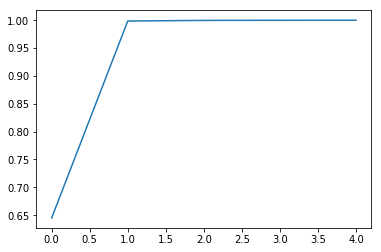

In [69]:
plt.plot(cum_var)
plt.show()

In [70]:
# 6. Kreirati klaster modele

from sklearn.cluster import KMeans

# print(X_train.head())

kmeans_algorithm = KMeans(n_clusters = 3, max_iter = 100)

print(kmeans_algorithm)

cluster_model = kmeans_algorithm.fit(X_train)
centers = cluster_model.cluster_centers_

print(centers)

    # outliers

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)
[[  0.26426426   0.21321321   0.03603604   0.02702703   0.08108108
    0.06906907   0.04804805   0.08408408   0.01801802   0.12912913
    0.02102102   0.00900901   0.10810811   0.63063063   0.25825826
    0.003003     0.13213213   0.02702703   0.14414414   0.24924925
    0.           0.13513514   0.27927928   0.03303303   0.78678679
    0.21321321  -0.           0.48348348   0.03003003   0.48648649
    0.81381381   0.03003003   0.15615616   0.68168168   0.31831832
    0.06906907   0.10510511   0.00900901   0.23723724   0.12912913
    0.00900901   0.3033033    0.12012012   0.00900901   0.00900901
    0.18018018   0.19219219   0.20720721   0.22522523   0.1951952
    0.11111111   0.88888889   0.           0.00600601   0.00900901
    0.01201201   0.01501502   0.00900901   0.03003003   0.21021021
   -0.    

In [71]:
X_train.shape

(2868, 73)

In [72]:
clusters = cluster_model.predict(X_train)
clusters

array([0, 1, 1, ..., 1, 2, 1])